## Decision Tree 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("../ml_datasets/fruits.csv")

In [43]:
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [44]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [45]:
x = df[['Weight', 'Size']]
y = df['Class']

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1, shuffle=True)

In [81]:
from sklearn.tree import DecisionTreeClassifier 
# USE DecisionTreeRegressor WHEN (y == numerical)
dt = DecisionTreeClassifier(criterion='entropy')    # Default is giny method, we change it with criterion
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

In [82]:
print("Training Accuracy: ", dt.score(xtrain, ytrain))
print("Testing Accuracy: ", dt.score(xtest, ytest))

Training Accuracy:  1.0
Testing Accuracy:  0.8


### Plotting of decision tree

[Text(0.5, 0.75, 'x[0] <= 69.5\nentropy = 0.997\nsamples = 30\nvalue = [16, 14]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]')]

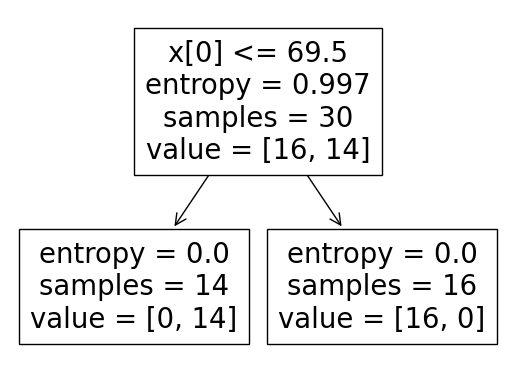

In [83]:
from sklearn.tree import plot_tree
plot_tree(dt)

[Text(0.5, 0.75, 'Weight <= 69.5\nentropy = 0.997\nsamples = 30\nvalue = [16, 14]\nclass = Apple'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Orange'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = Apple')]

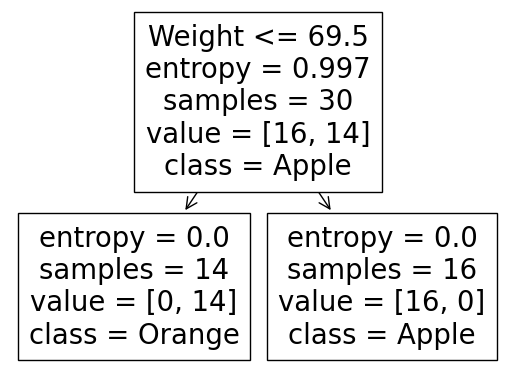

In [97]:
plot_tree(dt, feature_names=['Weight', 'Size'], class_names=['Apple', 'Orange'])

In [98]:
x = [[20, 8.8]]
dt.predict(x)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['orange'], dtype=object)

In [122]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=['Weight', 'Size']))

|--- Weight <= 69.50
|   |--- class: orange
|--- Weight >  69.50
|   |--- class: apple



In [123]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(DecisionTreeClassifier(), 
                     param_grid={'criterion':['entropy', 'gini']},
                     scoring="accuracy",
                     cv=5
                    )

In [124]:
model.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini']}, scoring='accuracy')

In [125]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [126]:
model.score(xtest,ytest)

1.0

In [127]:
print(export_text(model.best_estimator_, feature_names=['Weight', 'Size']))

|--- Size <= 4.97
|   |--- class: orange
|--- Size >  4.97
|   |--- class: apple



## Multiclass Classification Problem

In [137]:
df = pd.read_csv("../ml_datasets/BMI.csv")

In [138]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [158]:
x = df[['Gender', 'Height', 'Weight']]
y = df['Index']

In [159]:
x.value_counts(), y.value_counts()

(Gender  Height  Weight
 0       195     104       2
         182     84        2
 1       179     56        2
 0       164     71        2
         142     86        2
                          ..
         179     67        1
         178     154       1
                 107       1
                 79        1
 1       199     156       1
 Name: count, Length: 489, dtype: int64,
 Index
 5    198
 4    130
 2     69
 3     68
 1     22
 0     13
 Name: count, dtype: int64)

In [160]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1, shuffle=True)

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
# ['friedman_mse', 'squared_error', 'poisson', 'absolute_error']
model = GridSearchCV(DecisionTreeClassifier(), 
                     param_grid={'criterion':['entropy', 'gini'], 'max_depth' :[2,3,4,5,6], 'max_features' : [1,2,3]},
                     scoring="accuracy",
                     verbose=True,
                     cv=10
                    )

In [164]:
model.fit(xtrain, ytrain)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3]},
             scoring='accuracy', verbose=True)

In [165]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=3)

In [166]:
print(export_text(model.best_estimator_, feature_names=['Gender','Weight', 'Height']))

|--- Height <= 83.50
|   |--- Weigth <= 167.50
|   |   |--- Height <= 63.50
|   |   |   |--- Weigth <= 152.00
|   |   |   |   |--- Height <= 57.50
|   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Gender >  0.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- Height >  57.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- Weigth >  152.00
|   |   |   |   |--- Weigth <= 162.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Weigth >  162.50
|   |   |   |   |   |--- Weigth <= 163.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Weigth >  163.50
|   |   |   |   |   |   |--- class: 2
|   |   |--- Height >  63.50
|   |   |   |--- Weigth <= 148.50
|   |   |   |   |--- Weigth <= 141.50
|   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- Gender >  0.50
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- Weigth >  141.50
|   |   |   |   |   |--- cl

[Text(0.5089285714285714, 0.9285714285714286, 'x[2] <= 83.5\nentropy = 2.17\nsamples = 375\nvalue = [9, 19, 52, 51, 98, 146]'),
 Text(0.2910714285714286, 0.7857142857142857, 'x[1] <= 167.5\nentropy = 2.194\nsamples = 113\nvalue = [9, 19, 47, 20, 16, 2]'),
 Text(0.14642857142857144, 0.6428571428571429, 'x[2] <= 63.5\nentropy = 1.853\nsamples = 54\nvalue = [1, 0, 19, 16, 16, 2]'),
 Text(0.07142857142857142, 0.5, 'x[1] <= 152.0\nentropy = 0.998\nsamples = 23\nvalue = [1, 0, 17, 5, 0, 0]'),
 Text(0.04285714285714286, 0.35714285714285715, 'x[2] <= 57.5\nentropy = 0.863\nsamples = 7\nvalue = [0, 0, 2, 5, 0, 0]'),
 Text(0.02857142857142857, 0.21428571428571427, 'x[0] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 0, 2, 1, 0, 0]'),
 Text(0.014285714285714285, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.04285714285714286, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.05714285714285714, 0.21428571428571427, 

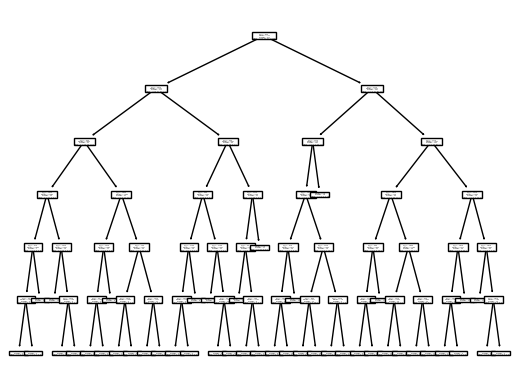

In [168]:
plot_tree(model.best_estimator_)

<Figure size 2500x2000 with 0 Axes>

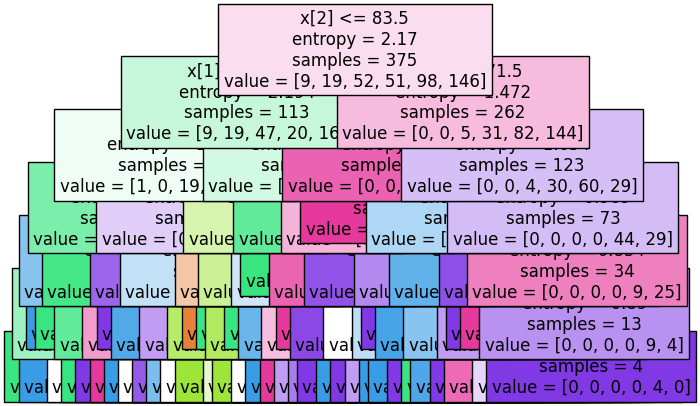

In [174]:
fig = plt.figure(figsize=(25,20))
plt.figure()
plot_tree(model.best_estimator_,filled=True, fontsize=12)  
plt.savefig('tree.eps',format='eps',bbox_inches = "tight", dpi=1000)

In [175]:
l = [23, 56, 45, 342]
def get_min(x):
    return min([int(i) for i in [*str(x)]])
sum = 0
for i in l:
    sum += get_min(i)
    
print(sum)

13
